# Importing the required libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset :

In [2]:
df = pd.read_csv(r"C:\Users\SATYA\Downloads\Housing.csv")

In [24]:
df.head(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


In [25]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [26]:
df.shape

(545, 13)

**As we can see our dataset has 545 rows and 13 columns.**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 44.7 KB


# Data Preprocessing :

In [28]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [30]:
# REMOVAL OF DUPLICATE VALUE 
counter = 0
rs, cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape == (rs, cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    counter = rs - df.shape[0]
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {counter}')


Inference: The dataset doesn't have any duplicates


**No null values present our dataset.**

In [35]:
from sklearn.preprocessing import LabelEncoder

categ = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]

le = LabelEncoder()

for col in categ:
    df[col] = le.fit_transform(df[col])


In [36]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


<AxesSubplot:>

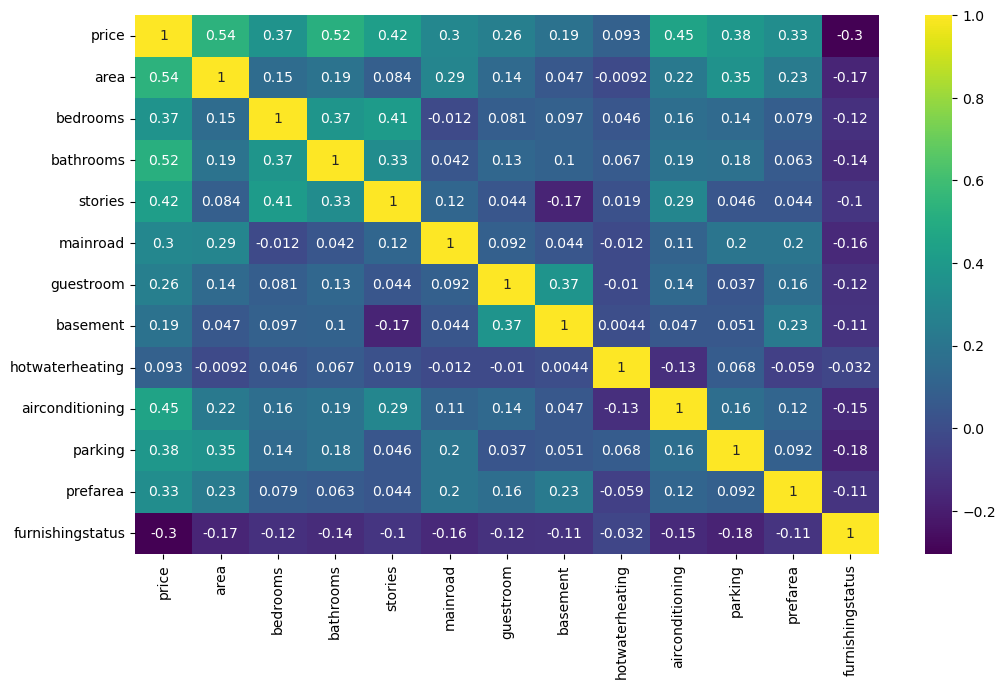

In [37]:
corr = df.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(corr, cmap='viridis', annot=True)

# Spliting The Dataset :

In [41]:
X = df.drop(['price'],axis=1)
y = df['price']

In [42]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [43]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=44)

In [54]:
# LENGTH OF X_train AND X_test

len(X_train),len(X_test)

(327, 218)

# Linear Regression :

In [55]:
# IMPORTING THE MODULE

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [56]:
# FITTING THE DATA INTO THE MODEL

model.fit(X_train,y_train)

LinearRegression()

In [57]:
# PREDICTING THE OUTCOMES

y_predict = model.predict(X_test)

In [58]:
y_predict

array([4283430.18097531, 4425274.14217632, 5552748.87772549,
       3776552.97925587, 6995848.7333052 , 2771432.48071601,
       5729491.94118002, 3041207.92612383, 4132821.9141067 ,
       6459732.08447183, 2353394.14279544, 3908839.79601105,
       3099597.15003303, 2625267.99789751, 3171988.02699789,
       5205415.16016126, 2795328.69979449, 4932882.01974044,
       6642813.04152849, 4365903.52819793, 3873338.69098513,
       5412353.79943138, 3203774.58543203, 5553993.70627974,
       2868961.91944863, 6135807.76028085, 5892988.31952763,
       2683772.00662944, 5933754.7437283 , 3991291.51122922,
       2861480.79181849, 4297256.23841627, 4531972.39576547,
       2623610.94945181, 6588488.61111814, 3651087.8762217 ,
       2219440.88364275, 3997434.60758676, 3210058.32000408,
       4887562.75192458, 6978252.59815807, 4828975.52305513,
       3467896.64184021, 4172951.08265524, 3905834.58212218,
       6613678.05694807, 6540217.96608401, 4122024.72252891,
       7400240.13763195,

# Evaluation :

In [59]:
from sklearn.metrics import r2_score,mean_absolute_error
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

In [60]:
score

0.6576078661510485

In [61]:
mae

773191.2229758643